In [1]:
import pandas as pd

%matplotlib inline

In [2]:
# extract useful columns
df = pd.read_csv(
    "../data/dnaq_history_data_2022.csv",
    parse_dates=["collection_time"],
    index_col="collection_time",
)
df = df[["COS", "P", "Ia", "Ib", "Ic", "Ua", "Ub", "Uc", "elec_degree"]]
df.to_csv("../data/dnaq_history_data_2022_ext.csv")

In [3]:
df = pd.read_csv(
    "../data/dnaq_history_data_2022_ext.csv",
    parse_dates=["collection_time"],
    index_col="collection_time",
)

In [4]:
df.head()

,COS,P,Ia,Ib,Ic,Ua,Ub,Uc,elec_degree
collection_time,,,,,,,,,
2022-01-01 00:00:04,0.00,0.000000,0,0.0,0.0,381,380,380,78405
2022-01-01 00:00:07,0.91,32.599998,58,61.0,59.0,375,373,377,490384
2022-01-01 00:00:10,0.00,0.000000,0,0.0,0.0,372,371,373,276878
2022-01-01 00:00:14,0.00,0.000000,0,0.0,0.0,372,373,372,198436
2022-01-01 00:00:17,0.90,33.299999,59,61.0,60.0,378,375,376,33039


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2123553 entries, 2022-01-01 00:00:04 to 2022-12-31 23:59:59
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   COS          float64
 1   P            float64
 2   Ia           int64  
 3   Ib           float64
 4   Ic           float64
 5   Ua           int64  
 6   Ub           int64  
 7   Uc           int64  
 8   elec_degree  int64  
dtypes: float64(4), int64(5)
memory usage: 162.0 MB


In [27]:
# fault_type columns using one hot encoding
# df = pd.get_dummies(df, columns=['fault_type'])

<Axes: >

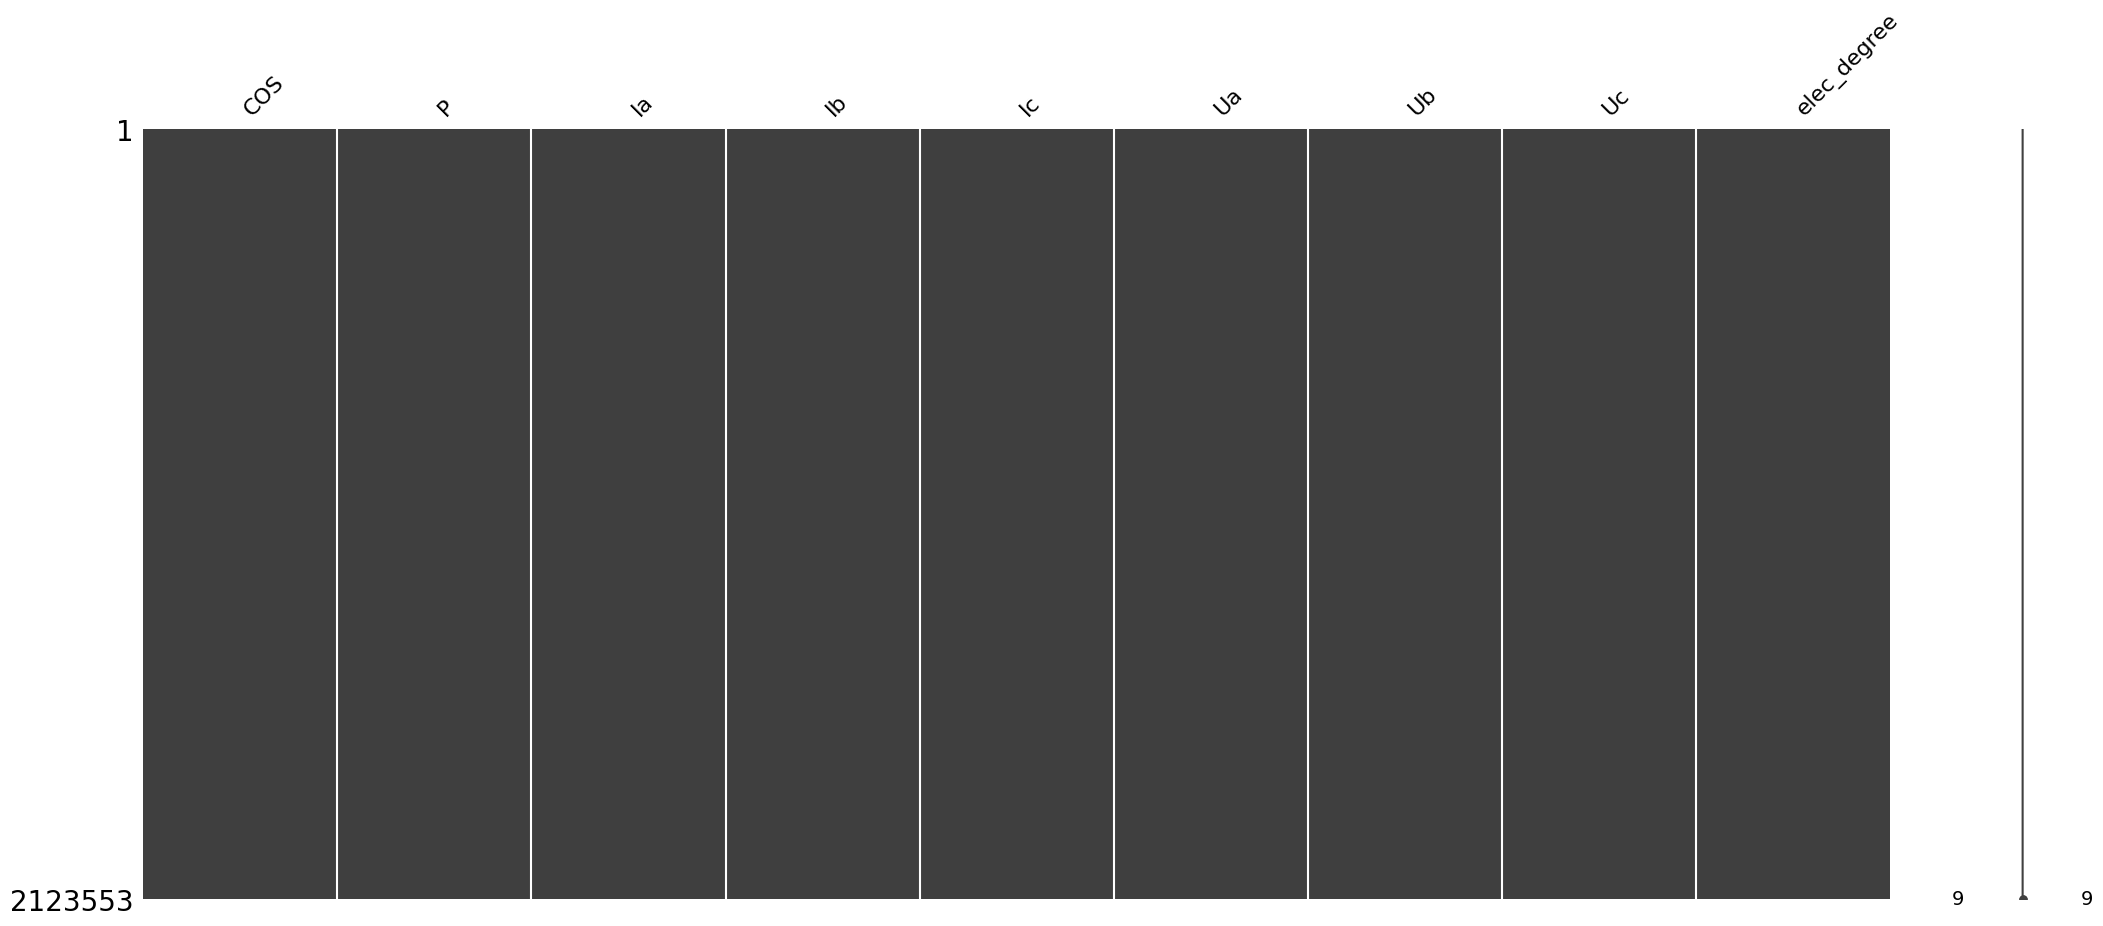

In [6]:
# 查看缺失值情况
import missingno as msno

msno.matrix(df)

In [6]:
# resample 1 s
df_1s_interval = df.resample("1s").last().ffill()
# save to csv
df_1s_interval.to_csv("../data/dnaq_1s_interval.csv")

In [29]:
# resample 15 s
df_15s_interval = df.resample("15s").last().ffill()
# save to csv
df_15s_interval.to_csv("../data/dnaq_15s_interval.csv")

<Axes: >

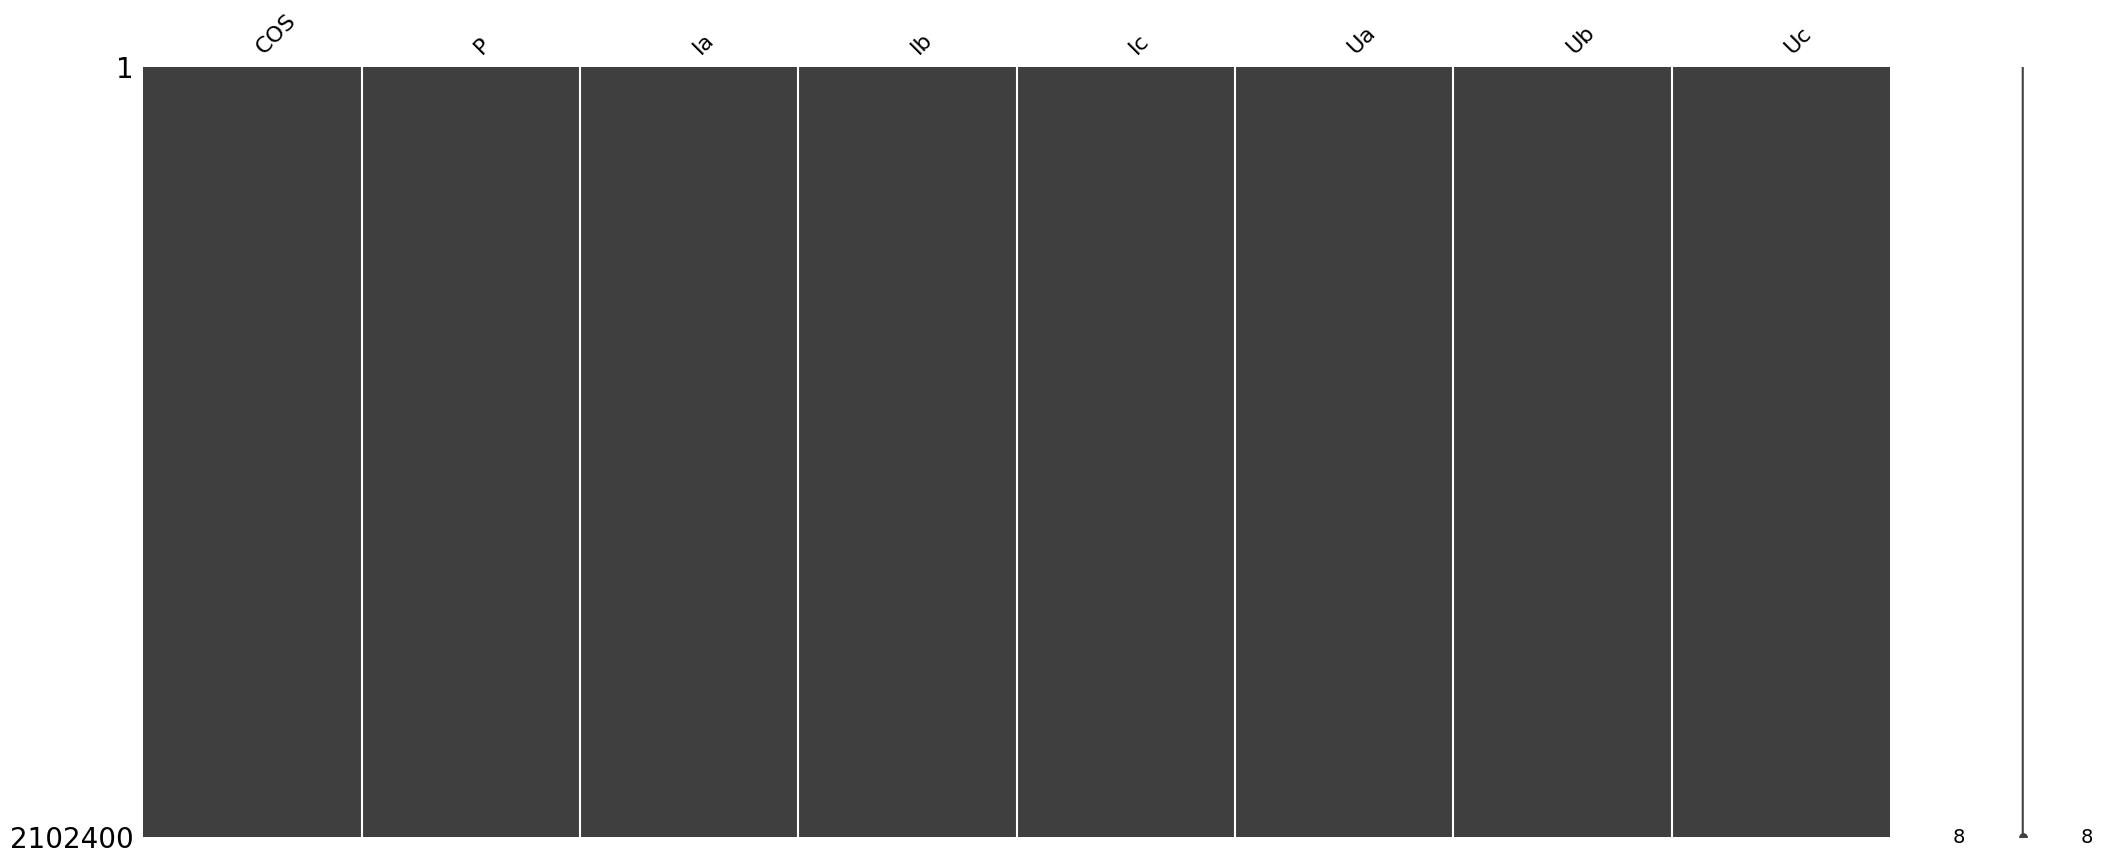

In [22]:
import missingno as msno

msno.matrix(df_15s_interval)

In [32]:
# resample 1 min
df_1min_interval = df.resample("1Min").last().ffill()
# save to csv
df_1min_interval.to_csv("../data/dnaq_1min_interval.csv")

In [33]:
# resample 5 min
df_5min_interval = df.resample("5Min").last().ffill()
df_5min_interval.head()
# save to csv
df_5min_interval.to_csv("../data/dnaq_5min_interval.csv")

In [6]:
# resample 15 min
df_15min_interval = df.resample("15Min").last().ffill()
# save to csv
# df_15min_interval.to_csv("../data/dnaq_15Min_interval.csv")

In [7]:
df_15min_interval = df.resample("15Min").last()

<Axes: >

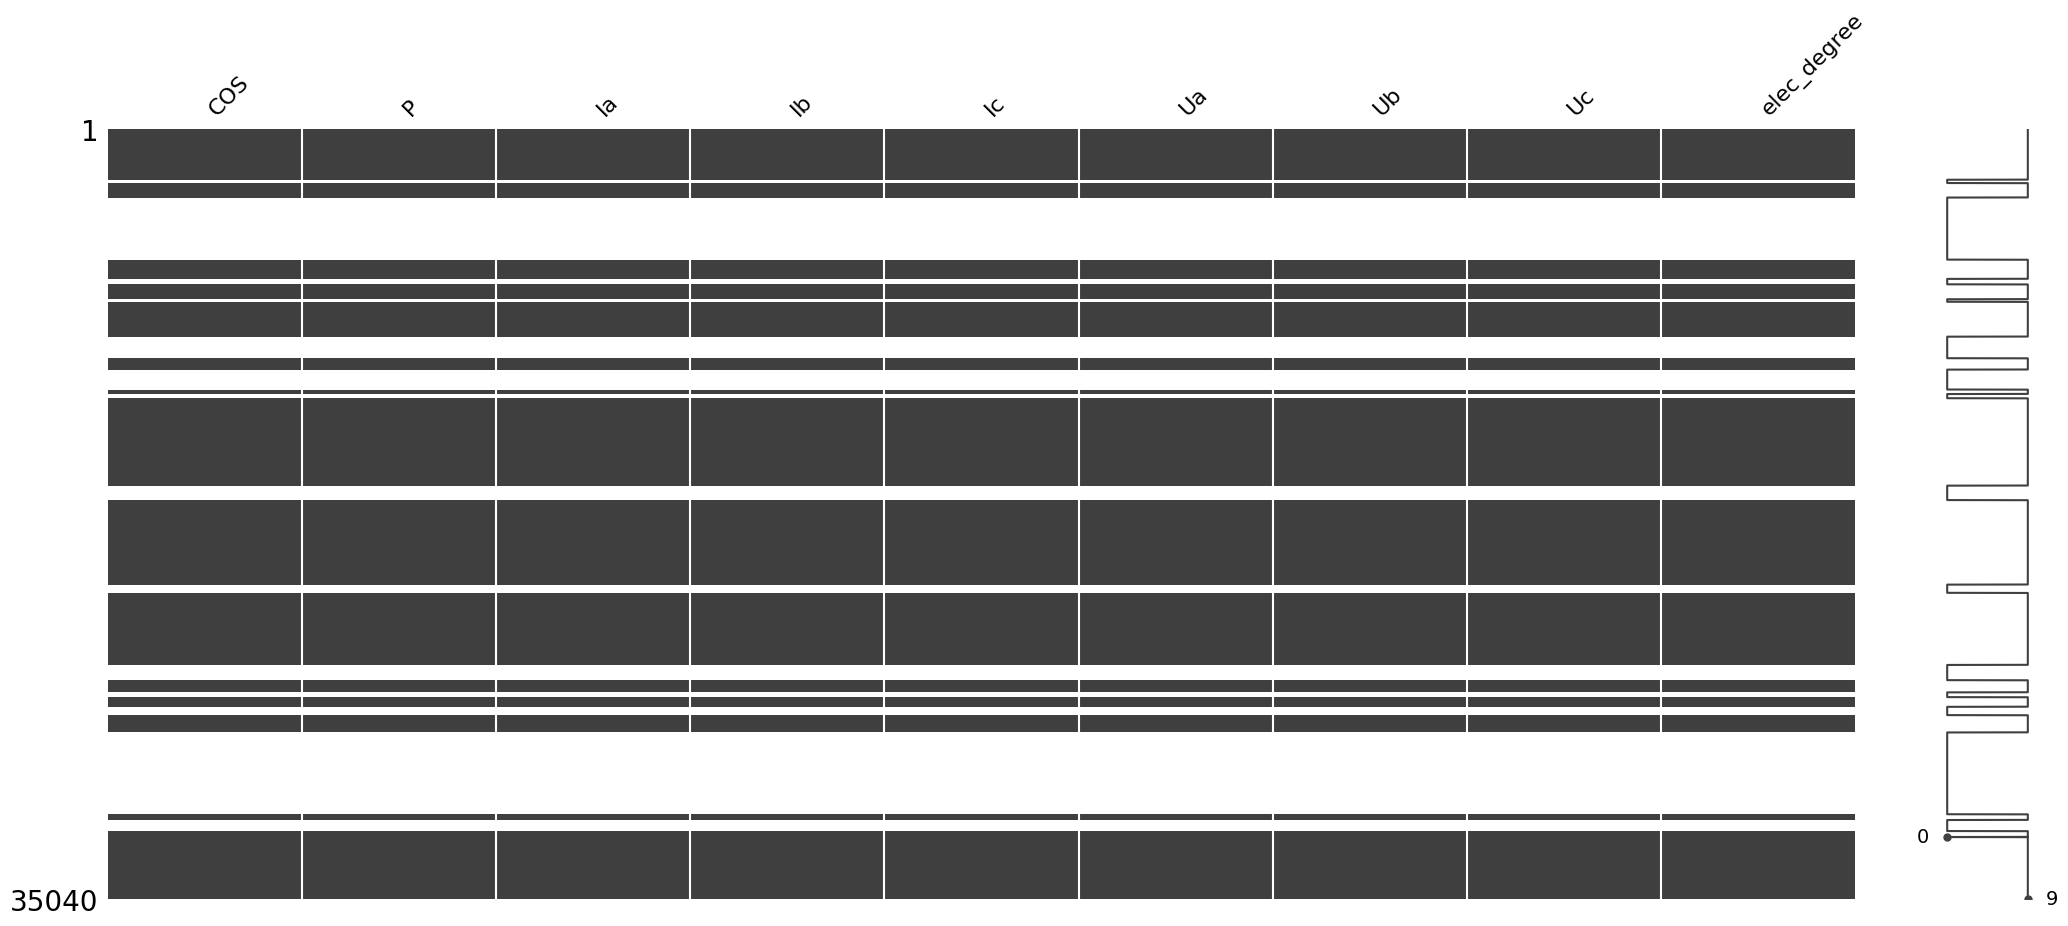

In [8]:
msno.matrix(df_15min_interval)